# Mission Command Data Analysis - Part 3 - Conclusions and Example Report Content
## By: Matthew Jacobsen

Welcome to the final installment of the Mission Command Data Analysis walkthrough.  Up to this point, we have prepared some fictional data for a mission command tool, the MCWidget, processed that fictional data to match the data between internal and external data representations, and extracted and matched that internal data with the graphical representation extracted from a screen capture of our MCWidget.  In this installment, we will take the matched data and prepare sample report inputs to inform and advise a notional decision maker on whether or not they should put this system into use or continue development.  

### Importing the data

To remind ourselves what we have, let's start by getting our data up and re-reviewing it.  

In [1]:
import pickle
import pandas as pd

with open('merged_instrumented_data_df.pkl','rb') as merged_in:
    instrumented_data = pd.DataFrame(pickle.load(merged_in))
    
with open('merged_display_data_df.pkl','rb') as display_in:
    display_data = pd.DataFrame(pickle.load(display_in))

In [2]:
instrumented_data.head()

,index,External Observed Time,To,From,Altitude,Latitude,Longitude,Speed,match_index,Internal Observed Time,altitude,from,latitude,longitude,speed,to,translation_time,network_coords,widget_coords,coords_diff
0,0,1586214746999,4,5,1500,38.8897,77.0206,25,0.0,1586214751618,1500,5,38.8897,77.0206,25,4,4619,"(38.8897, 77.0206)","(38.8897, 77.0206)",0.0
1,1,1586551601348,5,8,835,38.8892,77.0481,28,2.0,1586551614191,835,8,38.8892,77.0481,28,5,12843,"(38.8892, 77.0481)","(38.8892, 77.0481)",0.0
2,2,1586515475138,1,8,1186,38.8895,77.0353,25,3.0,1586515475433,1186,8,38.8895,77.0353,25,1,295,"(38.8895, 77.0353)","(38.8895, 77.0353)",0.0
3,3,1586271176350,7,7,1834,38.8898,77.0353,16,4.0,1586271183767,1834,7,38.8898,77.0353,16,7,7417,"(38.8898, 77.0353)","(38.8898, 77.0353)",0.0
4,4,1586627112164,6,10,2109,38.8895,77.0191,28,5.0,1586627122441,2109,10,38.8895,77.0191,28,6,10277,"(38.8895, 77.0191)","(38.8895, 77.0191)",0.0


In [3]:
display_data.head()

,Latitude_x,Longitude_x,match_index_x,level_0,index,External Observed Time,To,From,Altitude,Latitude_y,...,latitude,longitude,speed,to,translation_time,network_coords,widget_coords,coords_diff,Display Time,Graphical Displacement
0,38.889900,-77.038616,10,10,12,1586666814762,3,10,1096,38.8898,...,38.8898,77.0386,36,3,14382,"(38.8898, 77.0386)","(38.8898, 77.0386)",0.0,86701759,11.206605
1,38.889151,-77.035916,5,5,5,1586753502109,4,5,1500,38.8895,...,38.8895,77.0353,28,4,13794,"(38.8895, 77.0353)","(38.8895, 77.0353)",0.0,15000,65.990402
2,38.889567,-77.035332,18,18,24,1586688832759,9,4,2125,38.8895,...,38.8895,77.0353,39,9,6426,"(38.8895, 77.0353)","(38.8895, 77.0353)",0.0,64691718,7.953099
3,38.889567,-77.020374,0,0,0,1586214746999,4,5,1500,38.8897,...,38.8897,77.0206,25,4,4619,"(38.8897, 77.0206)","(38.8897, 77.0206)",0.0,538779285,24.544130
4,38.889434,-77.033037,14,14,18,1586520677952,10,7,1500,38.8893,...,38.8893,77.0341,27,10,10219,"(38.8893, 77.0341)","(38.8893, 77.0341)",0.0,232842732,93.176023


In addition to the matched data that we have above, let's also pull in the simulated raw network data we had going into the previous part.  The reason for this is that one of the metrics we'd like to report on is the Translation Success Rate, or how many messages successfully translated into the MCWidget.  In order to report that metric, we need to know how many messages *should* have translated into the system. 

In [4]:
with open('network_df.pkl','rb') as network_in:
    network_df = pd.DataFrame(pickle.load(network_in))

In [5]:
network_df.head()

,External Observed Time,To,From,Altitude,Latitude,Longitude,Speed
0,1586214746999,4,5,1500,38.8897,77.0206,25
1,1586551601348,5,8,835,38.8892,77.0481,28
2,1586515475138,1,8,1186,38.8895,77.0353,25
3,1586271176350,7,7,1834,38.8898,77.0353,16
4,1586627112164,6,10,2109,38.8895,77.0191,28


### Generating Graphics and Results

Now that we have our data imported, let's start by getting some quick metric information to include in our example report section. Some of the technical metrics that would be important here include the accuracy of the translated and displayed, the timeliness of the translated and displayed data, and the completeness of message translation (the number of network messages that translated correctly into the system).  The last of these is readily available with simple division.  

$$Completeness\  of\  Translation = \frac{Number\ of\ Translated\  Messages}{Number \  of \ Sent\  Messages}$$

In [6]:
(len(instrumented_data)/len(network_df))*100

74.19354838709677

So the Completeness of Translation for messages is 74.19 percent.  That's not a very high success rate for translating these messages and we will certainly want to illustrate that to the decision maker. 

Beyond this number, let's look at the timeliness for display and for translation.  Starting with translation, we have already calculated the translation time associated with the messages we are investigating.  Let's review where that data is. 

In [7]:
instrumented_data.columns

Index(['index', 'External Observed Time', 'To', 'From', 'Altitude', 'Latitude',
       'Longitude', 'Speed', 'match_index', 'Internal Observed Time',
       'altitude', 'from', 'latitude', 'longitude', 'speed', 'to',
       'translation_time', 'network_coords', 'widget_coords', 'coords_diff'],
      dtype='object')

In [8]:
instrumented_data['translation_time'].describe()

count       23.000000
mean      8919.130435
std       4443.217950
min        295.000000
25%       5748.500000
50%      10219.000000
75%      12756.000000
max      14859.000000
Name: translation_time, dtype: float64

So, the MCWidget was able to translate 74.19% of the messages within 8.919 seconds (the value in the statistics above is in milliseconds).  We also get a standard deviation and percentiles.  However, what if we want a confidence interval for this value.  Let's make some plots for this!

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

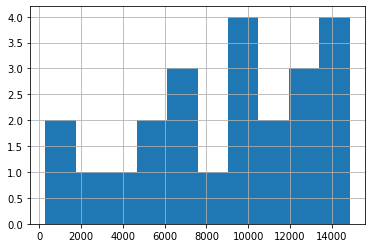

In [10]:
hist = instrumented_data['translation_time'].hist(bins=10)

This plot is *not* intended to be informative at this point.  It's designed to help us understand if we have enough samples to draw a conclusion.  Given the distribution we see, the translation time varies significantly (by design) and appears random (also by design).  A system that is being relied on by any user, let alone Soldiers, should have a reliable translation performance.  As such, this data, along with the completeness of translation would lead us to recommend that the MCWidget is not ready to leave the development shop yet, but let's see if we can find some more supporting evidence.  For example, what does the display time look like?

In [11]:
display_data.columns

Index(['Latitude_x', 'Longitude_x', 'match_index_x', 'level_0', 'index',
       'External Observed Time', 'To', 'From', 'Altitude', 'Latitude_y',
       'Longitude_y', 'Speed', 'match_index_y', 'Internal Observed Time',
       'altitude', 'from', 'latitude', 'longitude', 'speed', 'to',
       'translation_time', 'network_coords', 'widget_coords', 'coords_diff',
       'Display Time', 'Graphical Displacement'],
      dtype='object')

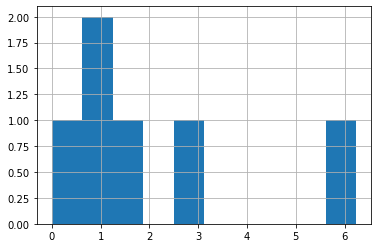

In [12]:
hist1 = (display_data['Display Time']/86400000).hist(bins=10)

Alright, so we have something that looks more like a distribution here.  That said, the times are enormous (the x-axis is in days). No user should be waiting days for their data to display on the screen.  There is obviously a problem here that needs to be highlighted and we can even isolate it to after the translation layer. 

Beyond just timeliness do we have any issues with the data though?  Let's take a look at the instrumented displacements.

In [13]:
instrumented_data['coords_diff'].describe()

count    23.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: coords_diff, dtype: float64

So the actual translation of the data, when it is successful seems to work as advertised.  There were no measurable differences between the network and the internal data positions.  How about for the other data that comprises the message?

In [14]:
instrumented_data['alt_diff'] = instrumented_data['Altitude'] - instrumented_data['altitude']
instrumented_data['speed_diff'] = instrumented_data['Speed'] - instrumented_data['speed']
instrumented_data['correct_reciever'] = instrumented_data['To'] == instrumented_data['to']
instrumented_data['correct_sender'] = instrumented_data['From'] == instrumented_data['from']
instrumented_data.head()

,index,External Observed Time,To,From,Altitude,Latitude,Longitude,Speed,match_index,Internal Observed Time,...,speed,to,translation_time,network_coords,widget_coords,coords_diff,alt_diff,speed_diff,correct_reciever,correct_sender
0,0,1586214746999,4,5,1500,38.8897,77.0206,25,0.0,1586214751618,...,25,4,4619,"(38.8897, 77.0206)","(38.8897, 77.0206)",0.0,0,0,True,True
1,1,1586551601348,5,8,835,38.8892,77.0481,28,2.0,1586551614191,...,28,5,12843,"(38.8892, 77.0481)","(38.8892, 77.0481)",0.0,0,0,True,True
2,2,1586515475138,1,8,1186,38.8895,77.0353,25,3.0,1586515475433,...,25,1,295,"(38.8895, 77.0353)","(38.8895, 77.0353)",0.0,0,0,True,True
3,3,1586271176350,7,7,1834,38.8898,77.0353,16,4.0,1586271183767,...,16,7,7417,"(38.8898, 77.0353)","(38.8898, 77.0353)",0.0,0,0,True,True
4,4,1586627112164,6,10,2109,38.8895,77.0191,28,5.0,1586627122441,...,28,6,10277,"(38.8895, 77.0191)","(38.8895, 77.0191)",0.0,0,0,True,True


In [15]:
instrumented_data['alt_diff'].describe()

count    23.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: alt_diff, dtype: float64

In [16]:
instrumented_data['speed_diff'].describe()

count    23.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: speed_diff, dtype: float64

So here we have some good news.  The contents match up pretty well.  Let's look at the coordinate differences with what was displayed. 

In [17]:
display_data['Graphical Displacement'].describe()

count     6.000000
mean     34.336232
std      36.779891
min       3.147135
25%       8.766476
50%      17.875368
75%      55.628834
max      93.176023
Name: Graphical Displacement, dtype: float64

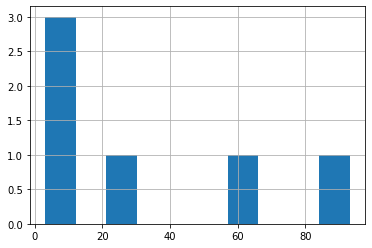

In [18]:
hist2 = (display_data['Graphical Displacement']).hist(bins=10)

The graphical displacement shows a relatively moderate level of variation.  We have to keep in mind that there are only 6 measurements, but they range from 3 to 93 meters.  In order to put this in context, we need to know that the most precision that might be required is around 20 meters.  Therefore, more than half of the measured values are reasonably within that range.

### Graphics Creation

Now that we know what information we have to present and generally where it lies (as far as supportive of function or derogatory against), we can generate the graphics to include in our sample report.  Some of the items that we have found to present obviously require no graphics at all.  The translation completion rate number, for example, can be reported as is to illustrate the magnitude of what we are looking at.  

Others, such as showing how far off the graphics are or clearly illustrating on some of the previous graphics where acceptable is, will require some effort to make graphics that clearly convey that message.  To this point, let's start by creating a graphical representation of how far off the various displayed graphics are.  For this, we will use the Folium library in Python. Folium is a leaflet map generator, for which overlays can be easily generated.  We will also have to do some work to get the data into a format useful for such a plot. 

So, starting with the map and adding some special features to pull in ArcGIS maps, we can get a quick view of our area of operations.

In [19]:
import folium

m = folium.Map(
    location=[38.8895, -77.0353],
    zoom_start=14,
    attr='Esri'
)

tile = folium.TileLayer(
    tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
    attr='Esri',
    name='Esri Satellite',
    overlay=False,
    control=True
).add_to(m)

In [20]:
m

Next, let's play with our data to get just the coordinates for both the graphics we saw and the locations they should have been from the data.

In [21]:
display_data.head()

,Latitude_x,Longitude_x,match_index_x,level_0,index,External Observed Time,To,From,Altitude,Latitude_y,...,latitude,longitude,speed,to,translation_time,network_coords,widget_coords,coords_diff,Display Time,Graphical Displacement
0,38.889900,-77.038616,10,10,12,1586666814762,3,10,1096,38.8898,...,38.8898,77.0386,36,3,14382,"(38.8898, 77.0386)","(38.8898, 77.0386)",0.0,86701759,11.206605
1,38.889151,-77.035916,5,5,5,1586753502109,4,5,1500,38.8895,...,38.8895,77.0353,28,4,13794,"(38.8895, 77.0353)","(38.8895, 77.0353)",0.0,15000,65.990402
2,38.889567,-77.035332,18,18,24,1586688832759,9,4,2125,38.8895,...,38.8895,77.0353,39,9,6426,"(38.8895, 77.0353)","(38.8895, 77.0353)",0.0,64691718,7.953099
3,38.889567,-77.020374,0,0,0,1586214746999,4,5,1500,38.8897,...,38.8897,77.0206,25,4,4619,"(38.8897, 77.0206)","(38.8897, 77.0206)",0.0,538779285,24.544130
4,38.889434,-77.033037,14,14,18,1586520677952,10,7,1500,38.8893,...,38.8893,77.0341,27,10,10219,"(38.8893, 77.0341)","(38.8893, 77.0341)",0.0,232842732,93.176023


In [22]:
map_location_x = [x for x in display_data['Latitude_x']]
map_location_y = [x for x in display_data['Longitude_x']]
map_locations = []

for i in range(len(map_location_y)):
    map_locations.append((map_location_x[i], map_location_y[i]))
    
widget_locations = [x for x in display_data['widget_coords']]

for i in range(len(widget_locations)):
    widget_locations[i] = (widget_locations[i][0], -1*widget_locations[i][1])

i=0
for coord_pair in map_locations:
    folium.Circle(
        location=coord_pair,
        radius = 5,
        color='cadetblue',
        fill = True,
        fill_color='cadetblue',
        popup='Map Location '+str(i)
    ).add_to(m)
    i+=1

i=0
for coord_pair in widget_locations:
    folium.Circle(
        location=coord_pair,
        radius=5,
        color='orange',
        fill = True,
        fill_color='orange',
        popup='Data Location '+str(i)
    ).add_to(m)
    i+=1

In [23]:
m

This is a pretty effective method to show how close or far the actual data is from where the marker show was.  So, let's save the views (one for each set of dots) out.  NOTE: At this point, the .to_png() method is not producing output as expected, so print screen and save as .png was used instead. 

Next, we need to take those graphs from earlier and massage them to illustrate what we have found.  Let's start with the time charts.  We know that translation times in excess of ~10 seconds is likely to be considered ineffective, when remembering that we are considering a resident process in our MCWidget and that this data is still not displayed to the user.  To come to this number, we need to know that (based upon the physics of satellite communications) a message of the size we are looking at should take around 3 seconds to make the satellite round trip.  That gives the translation up to a factor of three beyond the transmission time.  Let's try to illustrate that clearly on our plot. This time, we'll go with a higher quantity of bins to more clearly show where our times are located.

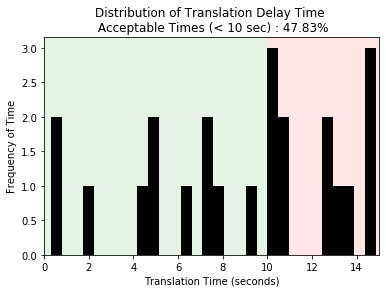

In [24]:
acceptable = float(len(instrumented_data[instrumented_data['translation_time']<10000]))
total = float(len(instrumented_data))
ratio = round((acceptable/total)*100,2)
fig = plt.figure()
plt.axvspan(0,10, facecolor='green', alpha=0.1)
plt.axvspan(10, 15, facecolor='red', alpha=0.1)
plt.hist(instrumented_data['translation_time']/1000, 30, facecolor='black')
plt.xlim(0,15)
plt.xlabel('Translation Time (seconds)')
plt.ylabel('Frequency of Time')
plt.title('Distribution of Translation Delay Time \n Acceptable Times (< 10 sec) : '+str(ratio)+'%')
plt.show()
fig.savefig('translation_time.png', dpi = fig.dpi)

So that graph clearly tells us the percentage that were acceptable by our definition, as well as clearly showing the distribution within the acceptable and unacceptable regions.  Let's do the same with the display times. For display times, we'll assume that if the data arrives at the users terminal within 1-2 minutes, they should be able to respond to it.  This give the internal handling of the data (from translation to display) around six times the amount of time afforded the translation itself. At this point, we probably have enough to prepare a draft report section on how the MCWidget accomplished it's goal, so let's transition to that. 


### Sample Report Input
The final step in this process would be to generate a sample report discussing what we have learned.  So, here we go....

----------------------------------------

# Effectiveness of Mission Command Widget

## Introduction

The Mission Command Widget (MCWidget) is a situational awareness application developed by Program Manager Whathisname with the intent of providing Army Soldiers and commanders with enhanced awareness of their battlespace, while also reducing the time required to command actions and manage unit positions.  In order to function, the MCWidget passes its data over a satellite based transmission network via text-based message formats.  Once these text-based messages are received at the various MCWidget-enabled end stations, MCWidget converts this data into an internal JavaScript Object Notation format via custom translation processes and then displays this data to the Soldier or commander using that terminal via an overhead satellite view of the local region. This overhead map view can be scrolled and customized to meet the needs of the user, using various layered views of data and scalable overhead views.

## Evaluation Overview

In order to assess the efficacy of the MCWidget in providing this situational awareness data, Test Agency A devised an experimental arrangement where known information was transmitted between various MCWidget-enabled terminals and collected via BlackMagic brand data collection toolsets. The content of the message was recorded, along with periodic captures of the display view of the MCWidget map, and timestamped for later analysis. 

## Assessment of Efficacy

Our analysis of the efficacy of the MCWidget as a situational awareness tool had demonstrated that the tool seems sufficient in its capacity to deliver accurate translations of mission data to the user.  However, it is unreliable in the timely delivery of that information and can take excessive time to present information to the user. In addition, MCWidget's displayed coordinates are borderline in their usability to the units requiring high precision and accuracy information for their functions. As a result, we recommend that the MCWidget continue development and undergo another test event in order to assess relevant improvements to the deficiencies noted below. 

### Data Translation Success Rate
This assessment determined that, with 80% confidence, the MCWidget was capable of translating network messages into the system with a success rate between 57 and 69%.  For this test, the assessment found a mean success rate of 62%. This means that, for 100 messages, 38 of them would not translate into the system. Further, the screen data indicates that the MCWidget does recognize incorrectly translated data and none of these were displayed to the user.  Despite this, the MCWidget's success rate suggests a user-observable level of messages will fail to translate to the displayed data, resulting in decreased user reliance on the MCWidget. 

### Data Accuracy
#### Translation of Data
We employed the data to assess the accuracy of the translation of data into and out of the MCWidget, comparing all fields available.  This analysis demonstrated that all 23 of the messages successfully translated in had data consistent with that on the network.  While this should continue to be monitored, the results demonstrate that the act of translating data into the system did not result in significant errors, even though the success rate should improve.

#### Display of Data
In addition to assessing the accuracy of the translation, we assessed graphical accuracy using video data from user terminals. Based upon this analysis, the MCWidget's displayed data was off by 34 meters on average, with this result between 13 and 52 meters using an 80% confidence.  The range of measured values was from 3 meters to 93 meters, suggesting that further measurement is needed.  For reference, users have indicated an acceptable error margin is less than 20 meters, so the measured data's lower bound meets this, while the point estimate does not.  We recommend that the developers continue to assess data accuracy between their translation service and the display in order to improve this graphical error.  Example displacements are shown in Figures 1 and 2 below, with orange representing data locations (two points have the same physical coordinates) and blue represented visual locations on the map. 

<img src='graphical_displacement1.png'>
<center> Figure 1</center>
<img src='graphical_displacement2.png'>
<center> Figure 2</center>

### Data Timeliness
#### Translation of Data
For the data that was translated correctly into the MCWidget, the tranlsation took a mean time of 8.9 seconds. The analysis performed suggests that, with 80% confidence, the true mean time lies between 7.7 and 10.1 seconds.  This time is approximately three times the data transmission time required by the satellite network, suggesting that the translation is not likely to delay the data to a degree that would engender lack of confidence from users.  The distribution of the delays shows that around 48% of the measured delays lie withing the acceptable region, with the highest mesaured delay coming around 14.5 seconds.  We recommend that the developers continue to improve the translation processes, with the objective of retaining translation times below 10 seconds, to minimize user awareness of the delay. The distribution of data is shown below in Figure 3.

<img src='translation_time.png'>
<center> Figure 3</center>

#### Display of Data
In addition to the translation induced delay, the MCWidget data demonstrated that the most significant issue was the representation of the graphical data to the user.  The data observed on the screen via display snapshots illustrated that some data was over six days old. There was no indication to the user that their displayed information was this significantly out of date.  We recommend that the developers implement methods to indicate to the user the relative age of the data being viewed.  

Beyond this, six graphics were represented on the screen, while 40 messages were sent.  Even considering the translation rate, this means that only 30% of the successfully translated graphics appeared on the screen.   We recommend the developers investigate this discrepancy, in order to maintain user confidence in the data delivered to them.

## Conclusions
Our assessment has demonstrated that the overall efficiacy of the MCWidget is not sufficient to put into production. The inability to display data age, obvious missing data, and low translation success rate suggest that users of the MCWidget are unlikely to trust the displayed information.  We recommend further development of the MCWidget, followed by further testing in order to assess improvements.


---------------------------------------------

And, there you have it.  Although the example report is fairly short, it covers the major points and uses graphics to convey to the reader elements of the analysis pertinent to their decision.  

As before, thank you for your attention during this walkthrough and I hope that the processes illustrated within are helpful to you.  Please feel free to investigate other walkthroughs I have included in the Data Science Portfolio.